# SLU03-Visualization with Pandas & Matplotlib: Learning notebook  

We start by importing pandas and matplotlib.  
See `matplotlib.pyplot` [documentation](https://matplotlib.org/api/pyplot_summary.html) and [tutorials](https://matplotlib.org/tutorials/index.html)

## Customizing plots (using object-oriented API)  

```python
# Plot using matplotlib's functional API:
# a single function call produces a plot; convenient but less flexible
plt.plot(x, y)

# Plot using matplotlib's object-oriented API:
# we figure and axis object: `fig` and `ax`
fig, ax = plt.subplots()
# we then use these objects to draw-on and manipulate our plot
ax.plot(x, y)
```

Although the code that invokes the functional API is simpler, it is far less powerful and flexible than the object-oriented API.

View the following tutorials [1](https://www.data-blogger.com/2017/11/15/python-matplotlib-pyplot-a-perfect-combination/), [2](https://www.pythonlikeyoumeanit.com/Module5_OddsAndEnds/Matplotlib.html).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

The command `%matplotlib notebook` will instruct Matplotlib to embed its plots within that notebook, rather than opening a separate window for each plot, and allow for zoom and resize the figure.

The command `%matplotlib inline` only draw static images in the notebook

Those are not valid lines of Python code, rather they are an example of jupyter notebook [magic commands](http://ipython.readthedocs.io/en/stable/interactive/magics.html).

In [2]:
%matplotlib inline

In [3]:
x = np.arange(0,361)
sin = np.sin(x*(np.pi/180))
cos = np.cos(x*np.pi/180)

In [4]:
d = {'sin': sin, 'cos': cos}
df = pd.DataFrame(d, index=x)
df.head()

,sin,cos
0,0.000000,1.000000
1,0.017452,0.999848
2,0.034899,0.999391
3,0.052336,0.998630
4,0.069756,0.997564


In Matplotlib, the `Figure` object is used to contain one or more sets of `Axes` objects. Data is plotted within a given set of axes. 

### Simple plot

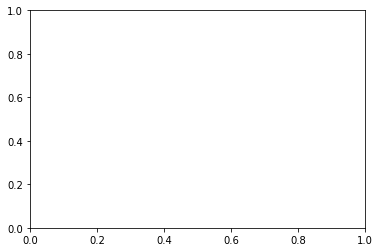

In [5]:
# Creating a figure that contains a single
# set of axes. `plt.subplots()` returns
# the tuple: (Figure-instance, Axes-instance)
fig, ax = plt.subplots()
#plt.figure(figsize=(10,2))

Executing this code will open a figure with a blank set of axes. We can use the `Axes` instance, `ax`, to plot data, add labels and a title to the plot, and add grid lines. The `Figure` instance, `fig`, controls higher-level features of the figure, such as the layout of the axes, the alignment of labels, and other factors.

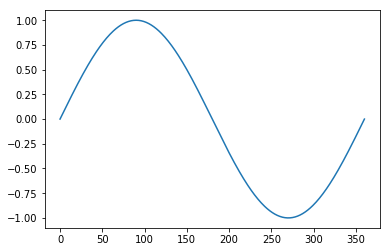

In [6]:
# Create the figure and two axes (two rows, one column)
fig, ax = plt.subplots()

# Create a plot of y = sin(x) on the first row
ax.plot(x, sin)

# Save the figure
plt.savefig('plots\sin.png')

### Subplots

The keyword arguments `nrows` and `ncols` instructs the figure to contain `nrows x ncols` number of axes objects, laid out in a commensurate grid. In this case the second item returned in the tuple by subplots is not a single axes object, but instead a 2-dimensional NumPy array of shape `(nrows, ngrids)`, containing the corresponding axes arguments.  

The `subplots` function can be fed the keyword argument `figsize` to control the size of the figure.

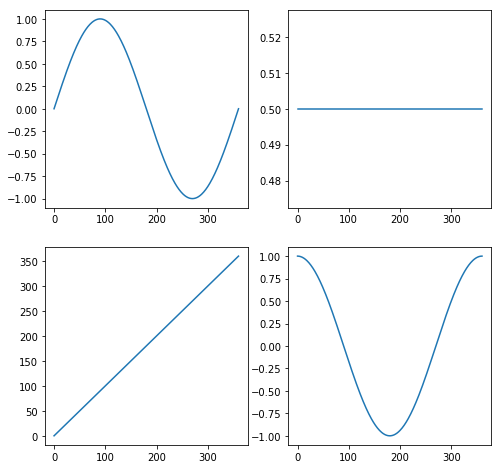

In [7]:
# Create the figure and two axes (two rows, one column)
fig, ax = plt.subplots(2, 2, figsize=(8, 8))

# Create a plot of y = sin(x) on the first row first column 
ax[0,0].plot(x, sin)

# First rwo second column
ax[0,1].plot(x, 0.5*np.ones(x.size))

# Second row first column
ax[1,0].plot(x, x)

# Second row second column
ax[1,1].plot(x, cos)

# Save the figure
plt.savefig('plots/sin_cos_4.png')

### The Axes object - More plots in the same axis

The axes object is used to control the appearance of data within a plot. A quick glance at the [official documentation](https://matplotlib.org/api/axes_api.html) for the axes object reveals that it is nearly “one object to rule them all”.  

It permits us to control the type of plotting being performed:

* `Axes.plot`: lines with data markers
* `Axes.scatter`: a scatter plot of x-y markers, without lines
* `Axes.hist`: a histogram
* `Axes.bar`: a bar chart
* `Axes.pie`: a pie chart
* `Axes.imshow`: draw an image within the axes
* `Axes.contour`: create a contour plot  

Furthermore, the axes object controls the scales of the axes (e.g. log-scaling versus linear-scaling). It permits us to create axis labels, a title, and to affect smaller details like a plot’s grid lines, tick-mark spacing, and many other items. In summary, you will be using the axes object to affect most aspects of your plot.

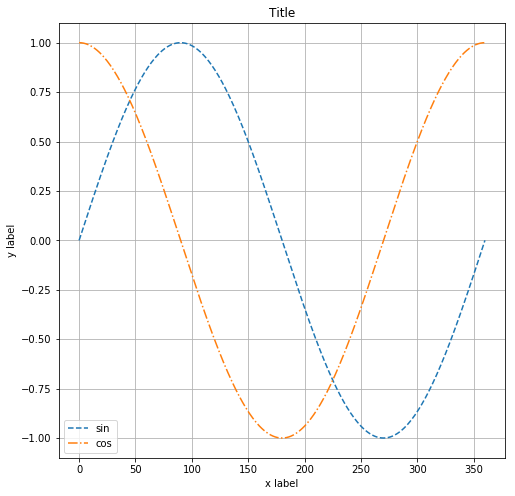

In [8]:
# Create the figure and two axes (two rows, one column)
fig, ax = plt.subplots(figsize=(8, 8))

# Create the first plot 
ax.plot(x, sin, linestyle="--", label='sin')

ax.plot(x, cos, linestyle="-.", label='cos')

# add legend of labels to top-right
ax.legend(loc="lower left")

# annotate the axes with labels and a title
ax.set_xlabel("x label")
ax.set_ylabel("y label")
ax.set_title("Title")

# turn on x-y grid lines
ax.grid(True)

# Save the figure
plt.savefig('plots/sin_cos.png')

In [9]:
data = pd.read_csv("data/online_orders.csv")
data.head()

,country,date,sales,n_items,n_orders,day_of_week
0,Australia,2010-12-01,358.25,107,1,2
1,Australia,2010-12-08,258.90,214,1,2
2,Australia,2010-12-17,415.70,146,1,4
3,Australia,2011-01-06,7154.38,4802,2,3
4,Australia,2011-01-10,81.60,96,1,0


## Scatter plots

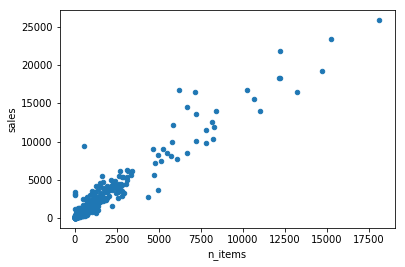

In [10]:
data.plot.scatter(x='n_items', y='sales');

**Set index as date**

In [11]:
data = data.set_index('date')
data.head()

,country,sales,n_items,n_orders,day_of_week
date,,,,,
2010-12-01,Australia,358.25,107,1,2
2010-12-08,Australia,258.90,214,1,2
2010-12-17,Australia,415.70,146,1,4
2011-01-06,Australia,7154.38,4802,2,3
2011-01-10,Australia,81.60,96,1,0


## Line plot

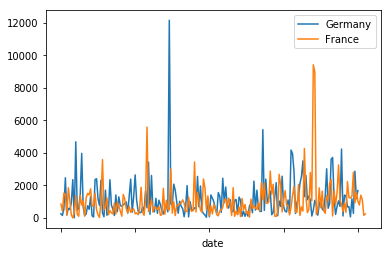

In [12]:
data[data.country=='Germany'].sales.plot(label="Germany")
data[data.country=='France'].sales.plot(label="France")
plt.legend();

## Bar/Column chart

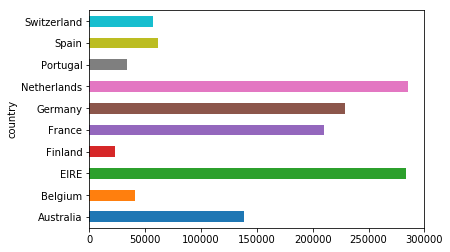

In [13]:
# same thing as data.groupby('country')['sales'].sum().plot(kind="barh");
data.groupby('country')['sales'].sum().plot.barh();

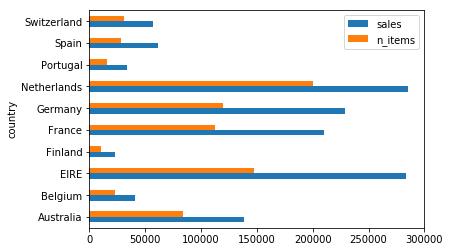

In [14]:
data.groupby('country')['sales', 'n_items'].sum().plot.barh();

In [15]:
print(type(data.groupby('country')['sales']))
print(type(data.groupby('country')['sales'].sum()))
print(type(data.groupby('country')['sales', 'n_items'].sum()))

<class 'pandas.core.groupby.groupby.SeriesGroupBy'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [16]:
data.groupby('country')['sales'].sum()

country
Australia      138521.31
Belgium         41196.34
EIRE           283453.96
Finland         22546.08
France         209715.11
Germany        228867.14
Netherlands    285446.34
Portugal        33747.10
Spain           61577.11
Switzerland     57089.90
Name: sales, dtype: float64

In [17]:
data.groupby('country')['sales', 'n_items'].sum()

,sales,n_items
country,,
Australia,138521.31,83901
Belgium,41196.34,23237
EIRE,283453.96,147173
Finland,22546.08,10704
France,209715.11,112103
Germany,228867.14,119261
Netherlands,285446.34,200361
Portugal,33747.10,16258
Spain,61577.11,27940


## Histograms

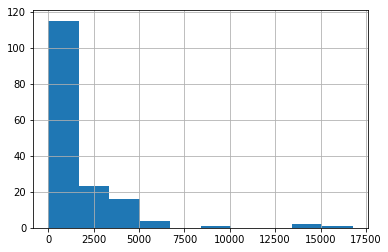

In [18]:
# same thing as data[data.country=='EIRE'].sales.plot(kind="hist");
data[data.country=='EIRE'].sales.hist();

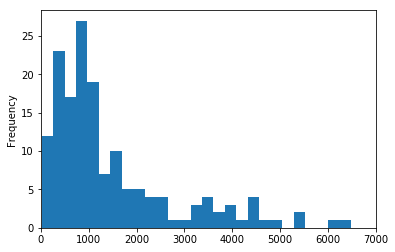

In [19]:
data[data.country=='EIRE'].sales.plot.hist(xlim=(0,7000), bins=70);

## Box Plot

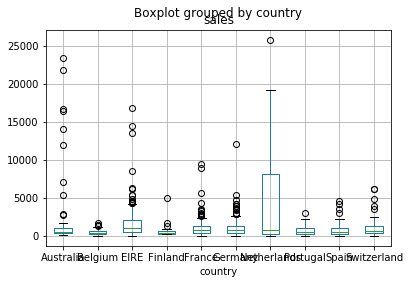

In [20]:
# kind="boxplot" doesnt work since its not part of the pandas.plot api for legacy reasons
data.boxplot(column="sales", by="country");

## Costumization, labels and titles

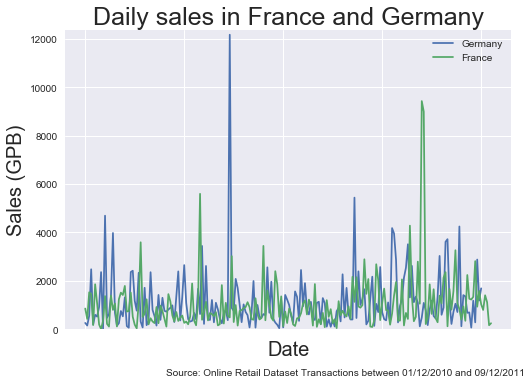

In [21]:
# We can change the style and make use of all of matplotlib styles
plt.style.use('seaborn')

# Make the plots
data[data.country=='Germany'].sales.plot(label="Germany")
data[data.country=='France'].sales.plot(label="France")

#Include 'Germany' and 'France' legends
plt.legend()
plt.ylim(0, 12350)

plt.title("Daily sales in France and Germany", size=25)
plt.xlabel("Date", size=20)
plt.ylabel("Sales (GPB)", size=20)
plt.figtext(.3, .01, "Source: Online Retail Dataset Transactions between 01/12/2010 and 09/12/2011");

In [22]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']